# Plot x, y data from a databroker run

This Bluesky notebook only uses the `databroker` package (and `matplotlib`) to plot $(x,y)$ data from a previous measurement.

## 1. Show what data catalogs are available

In [1]:
import databroker
list(databroker.catalog)

['bdp2022',
 'class_2021_03',
 '6idb_export',
 'apstools_test',
 'class_data_examples',
 'usaxs_test',
 'korts202106',
 'training']

## 2. Choose a specific run from a catalog

Here, the `class_data_examples` catalog will be used.  As shown in step 3 below, the run with `scan_id=86` has a scan of detector vs. motor: (`m1`, `noisy`).

In [2]:
cat = databroker.catalog["class_data_examples"]
run = cat.v2[86]
run

BlueskyRun
  uid='d19530f7-1ca6-4c02-a83b-229b3d92b6d1'
  exit_status='success'
  2021-03-06 14:10:46.462 -- 2021-03-06 14:10:49.317
  Streams:
    * baseline
    * primary


## 3. Show the (primary) data

Get all the data available from the `primary` stream.  The primary stream is where bluesky stores the data acquired from a scan.  `databroker` returns this data as an [xarray Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html).

In [3]:
dataset = run.primary.read()
dataset

<xarray.Dataset>
Dimensions:           (time: 23)
Coordinates:
  * time              (time) float64 1.615e+09 1.615e+09 ... 1.615e+09 1.615e+09
Data variables:
    m1                (time) float64 0.939 0.941 0.942 ... 0.968 0.969 0.971
    m1_user_setpoint  (time) float64 0.9392 0.9407 0.9421 ... 0.9693 0.9708
    noisy             (time) float64 8.589e+03 1.067e+04 ... 1.076e+04 8.774e+03

## 4. Get data for the $x$ and $y$ axes

Pick the `m1` (motor readback value) and `noisy` data for motor and detector, respectively.  These are [numpy ndarrays](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

In [4]:
motor = dataset["m1"].values
detector = dataset["noisy"].values

## 5. Use MatPlotLib

In [5]:
import matplotlib.pyplot as plt

## 6. Plot $(x,y)$ using matplotlib

Follow the MatPlotLib [tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) to learn how to customize this plot.

Text(0, 0.5, 'noisy')

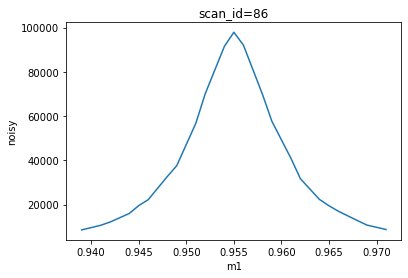

In [6]:
plt.plot(motor, detector)
plt.title(f"scan_id={run.metadata['start']['scan_id']}")
plt.xlabel(dataset["m1"].name)
plt.ylabel(dataset["noisy"].name)